# Data modelling
**Part 2**

Considering the high number of predictor variables(100), the algorithms used for classifying the edibility are decision tree, random forest, and support vector machine because these algorithms have superior accuracy and computational performance on high dimensional data. 

Logistic regression might be a better alternative for deployment

Utilizing more than 1 model gives me a baseline model for comparison that will eliminate the possibility of oversight in this experiment when determining the causality of machine learning performance. I will test these models with exhaustive grid search to optimize the hyperparamaters, and compare them against a baseline model with the default hyperparameter values.

## Real-life considerations
In real life applications, a binary classifier predicicting the edibility of something isn't the safest or most useful model to use. If classification was performed for the production of consumable or medicine, there is a vastly high risk of consuming a poisonous product that was wrongly classified as edible. Logistic regression that returns the probability of toxicity is more useful. 

However binary classification still has some value when using the metrics of a confusion matrix

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("agaricus-lepiota_processed.data")
print(data.shape)
data.head()

(8124, 118)


cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            1              0              0              1              0   

   ...  population_y  habitat_d  habitat_g  habitat_l  habitat_m  habitat_p  \
0  ...             0          0          0          0          0          0   
1  ...             0          0          1          0          0          0   
2  ...             0          0          0          0          1          0   
3  ...             0          0          0          0          0          0   
4  ...             0          0          1          0          0          0   

   habitat_u  habitat_w  edibility_e  edibility_p  
0          1          0            0            1  
1          0          0            1            0  
2          0          0            1            0  
3          1          0            0            1  
4          0          0            1            0  

[5 rows x 118 columns]

## Metric selection and configuring settings

The target attribute is a binary class label. Due to the high importance of remove false negatives as we are testing whether a fungi is poisonous. I will check accuracy, recall, and the ROC AUC score

In [40]:
X = data.iloc[:,:-1].to_numpy()
y = data.iloc[:,-1:].to_numpy().flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [41]:
print('training samples: '+str(len(X_train)))
print('testing samples: '+str(len(X_test)))

training samples: 6499
testing samples: 1625


## Decision tree

In [42]:
dt = DecisionTreeClassifier(random_state=1)

In [43]:
# Comparing the accuracy of a baseline model and the gridsearch model
dt_control = DecisionTreeClassifier()
y_ = dt_control.fit(X_train, y_train).predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_)}')
print(f'recall: {recall_score(y_test, y_)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_)}')

accuracy: 1.0
recall: 1.0
ROC AUC: 1.0


## Random forest

In [44]:
rf = RandomForestClassifier(random_state=1)

param_grid = {'criterion':['gini','entropy'],
              'min_samples_split':[2, 10, 30],
              'min_samples_leaf':[1, 10, 30],
              'min_weight_fraction_leaf':[0, .1],
              'max_leaf_nodes':[0, 20]}

gridsearch_rf_class = GridSearchCV(estimator=rf,
                     param_grid=param_grid,
                     scoring='recall',
                     cv=5)

In [46]:
gridsearch_rf_class.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    se

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [0, 20],
                         'min_samples_leaf': [1, 10, 30],
                         'min_samples_split': [2, 10, 30],
                         'min_weight_fraction_leaf': [0, 0.1]},
             scoring='recall')

In [52]:
# gridsearch training set accuracy vs testing set accuracy
y_ = gridsearch_rf_class.best_estimator_.predict(X_train)
print(f'Training set accuracy: {accuracy_score(y_train, y_)}')
print(f'Training set recall: {recall_score(y_train, y_)}')
print(f'Training set accuracy: {roc_auc_score(y_train, y_)}')

y_ = gridsearch_rf_class.best_estimator_.predict(X_test)
print(f'Testing set accuracy: {accuracy_score(y_test, y_)}')
print(f'Testing set recall: {recall_score(y_test, y_)}')
print(f'Testing set accuracy: {roc_auc_score(y_test, y_)}')

Training set accuracy: 1.0
Training set recall: 1.0
Training set accuracy: 1.0
Testing set accuracy: 1.0
Testing set recall: 1.0
Testing set accuracy: 1.0


## Support vector machine

In [53]:
svm = SVC()
              
param_grid = {
    'C': [1,2],
    'kernel':['linear','poly','rbf','sigmoid'],
    'tol':[.001, .01]
}

gridsearch_svm_class = GridSearchCV(estimator=svm,
                     param_grid=param_grid,
                     scoring='recall',
                     cv=5)

In [55]:
gridsearch_svm_class.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'tol': [0.001, 0.01]},
             scoring='recall')

In [56]:
# gridsearch training set accuracy vs testing set accuracy
y_ = gridsearch_svm_class.best_estimator_.predict(X_train)
print(f'Training set accuracy: {accuracy_score(y_train, y_)}')
print(f'Training set recall: {recall_score(y_train, y_)}')
print(f'Training set accuracy: {roc_auc_score(y_train, y_)}')

y_ = gridsearch_svm_class.best_estimator_.predict(X_test)
print(f'Testing set accuracy: {accuracy_score(y_test, y_)}')
print(f'Testing set recall: {recall_score(y_test, y_)}')
print(f'Testing set accuracy: {roc_auc_score(y_test, y_)}')

Training set accuracy: 1.0
Training set recall: 1.0
Training set accuracy: 1.0
Testing set accuracy: 1.0
Testing set recall: 1.0
Testing set accuracy: 1.0


In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
plt.rcParams['figure.figsize']=(5, 5) 
plot_confusion_matrix(gridsearch_rf_class.best_estimator_, X_test, y_test)  
plt.show()

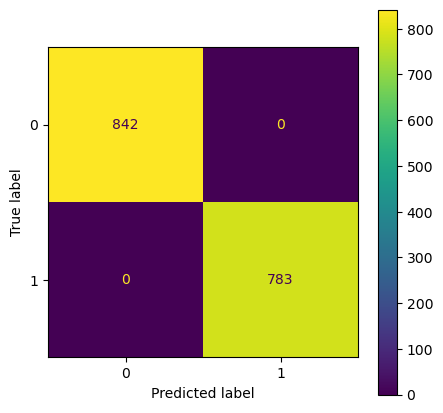

In [65]:
plt.rcParams['figure.figsize']=(5, 5) 
plot_confusion_matrix(gridsearch_svm_class.best_estimator_, X_test, y_test)  
plt.show() 